In [1]:
#1. 引入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from pandas.io.formats.info import frame_see_also_sub

rcParams['font.sans-serif'] = 'STHeiTi'

In [2]:
# 2. 导入数据
df = pd.read_csv('data/house_sales.csv')


In [3]:
# 3. 数据概览
print("总记录数：",len(df))
print("字段数量",len(df.columns))
df.head(5)
df.info()

总记录数： 106118
字段数量 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [4]:
# 4. 数据清洗
df.drop(columns='origin_url',inplace=True)
#处理缺失值
df.isna().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
#面积去除单位
df['area'] = df['area'].str.replace('㎡','').astype(float)
df['price'] = df['price'].str.replace('万','').astype(float)
# 朝向的数据类型转换
df['toward'] = df['toward'].astype('category')
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)
df['year'] = df['year'].str.replace('年建','').astype(int)
df = df[(df['area'] < 600) & (df['area'] > 20)]

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 - 1.5 * IQR
high_price = Q3 + 1.5 * IQR
df = df[(df['price'] < high_price) & (df['price'] > low_price)]



In [9]:
# 5. 新数据特征的构造
# 地区 district
df['district'] = df['address'].str.split('-').str[0]
# 楼层类型 floor_type
df['floor_type'] = df['floor'].str.split('（').str[0]
# 是否是直辖市 zxs
def fun2(str2):
    if str2 in ['北京','上海','天津','重庆']:
        return True
    else:
        return False
df['zxs'] = df['city'].apply(fun2)
# 卧室数量 bedrooms
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)
# 客厅数量 livingrooms
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)
# 楼龄 building_age
df['building_age'] = 2025 - df['year']
# 价格分段 price_labels
df['price_labels'] = pd.cut(df['price'],bins=4,labels=['低','中','高','豪华'])

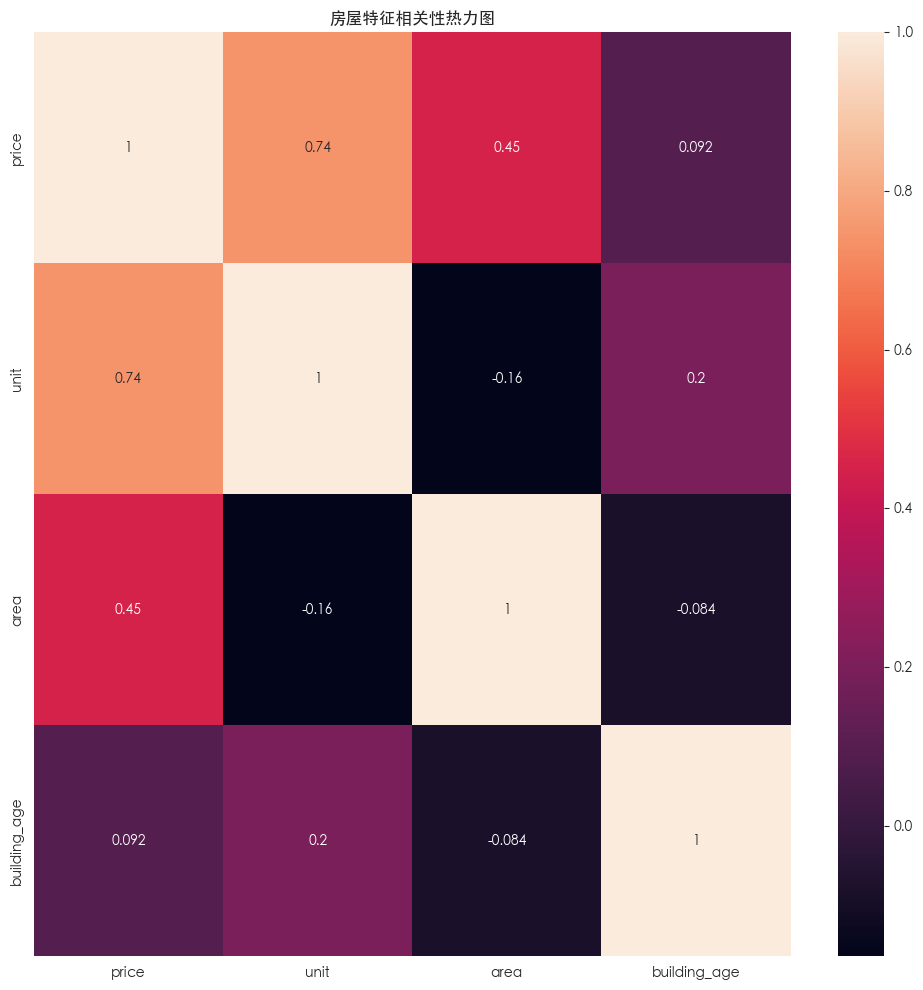

In [32]:
# 6. 问题分析及数据可视化
a = df[['price','unit','area','building_age']].corr()
#对房价影响最大的几个因素的排序
a['price'].sort_values(ascending=False)[1:]
#相关性热力图
plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True)
plt.title('房屋特征相关性热力图')
plt.tight_layout()

(array([ 991., 4810., 6499., 4613., 3362., 2226., 1333., 1055.,  691.,
         555.]),
 array([  9. ,  38.7,  68.4,  98.1, 127.8, 157.5, 187.2, 216.9, 246.6,
        276.3, 306. ]),
 <BarContainer object of 10 artists>)

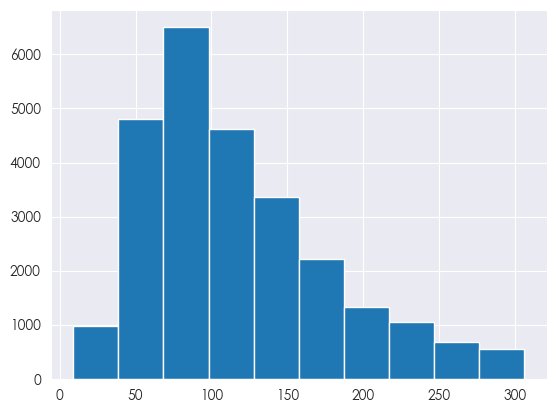

In [37]:
#房价分布直方图
plt.subplot(111)
(plt.hist(df['price'],bins=10))


In [27]:
df.head()


,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bedrooms,livingrooms,building_age,price_labels
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中层,False,3,2,12,中
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中层,False,3,2,6,中
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中层,False,2,1,8,低
6,合肥,龙岗-长江东路与和县里交口,50.0,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高层,False,2,1,6,低
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.0,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中层,False,4,2,13,高
